1. Discuss
2. Data Gathering
3. Data Cleaning
4. Feature Engineering
5. Outlier Detection
6. Mising Value Imputation
7. Feature Selection
8. Model Training
8. Model Evaluation
9. Model Deployment

---


#Feature Selection

In [68]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [69]:
pd.set_option('display.max_columns', None)

In [70]:
df = pd.read_csv('../3-feature-engieering/gurgaon_properties_missing_value_imputation.csv')

In [71]:
df.shape

(3544, 19)

In [72]:
df =df.drop(columns=['Unnamed: 0'])

In [73]:
df.head()

,property_type,society,sector,price,price_per_sqft,bedRoom,bathroom,balcony,floorNum,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
0,flat,emaar mgf palm hills,sector 77,1.50,12744.0,3,3,3,4.0,Relatively New,1310.0,0,0,0,0,0,2,97
1,flat,raheja vedaanta,sector 108,0.85,4637.0,3,3,2,2.0,Relatively New,1500.0,0,1,0,0,0,0,65
2,flat,511 sarahah tower,sector 12,0.60,8333.0,2,2,1,0.0,New Property,800.0,0,0,0,1,0,1,0
3,flat,laxmi pareena,sector 99a,0.30,6667.0,2,1,0,12.0,New Property,500.0,0,0,0,0,0,0,0
4,flat,emaar gurgaon greens,sector 102,1.55,9394.0,3,4,3,7.0,Relatively New,1315.0,0,1,0,0,0,2,152


# It does not make sense to ask for 'society' and 'price_per_sqft' from the user because if they know this, they can predict the price of the property themselves, making our model unnecessary.    

In [74]:
train_df = df.drop(columns=['society','price_per_sqft'])

In [75]:

train_df.head()

,property_type,sector,price,bedRoom,bathroom,balcony,floorNum,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
0,flat,sector 77,1.50,3,3,3,4.0,Relatively New,1310.0,0,0,0,0,0,2,97
1,flat,sector 108,0.85,3,3,2,2.0,Relatively New,1500.0,0,1,0,0,0,0,65
2,flat,sector 12,0.60,2,2,1,0.0,New Property,800.0,0,0,0,1,0,1,0
3,flat,sector 99a,0.30,2,1,0,12.0,New Property,500.0,0,0,0,0,0,0,0
4,flat,sector 102,1.55,3,4,3,7.0,Relatively New,1315.0,0,1,0,0,0,2,152


---

### **Are all features useful for predicting the price of the property?**   

### luxury score

<Axes: ylabel='luxury_score'>

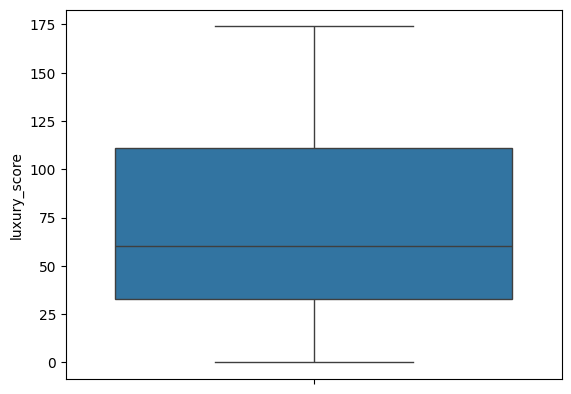

In [76]:
sns.boxplot(df['luxury_score'])

In [77]:
def categorize_luxury(score):
    # Categorize luxury score into Low, Medium, High, or None based on the score range
    if 0 <= score < 50:
        return "Low"
    elif 50 <= score < 150:
        return "Medium"
    elif 150 <= score <= 175:
        return "High"
    else:
        return None  # or "Undefined" or any other label for scores outside the defined bins

In [78]:
train_df['luxury_category'] = train_df['luxury_score'].apply(categorize_luxury)

In [79]:
train_df.head()

,property_type,sector,price,bedRoom,bathroom,balcony,floorNum,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score,luxury_category
0,flat,sector 77,1.50,3,3,3,4.0,Relatively New,1310.0,0,0,0,0,0,2,97,Medium
1,flat,sector 108,0.85,3,3,2,2.0,Relatively New,1500.0,0,1,0,0,0,0,65,Medium
2,flat,sector 12,0.60,2,2,1,0.0,New Property,800.0,0,0,0,1,0,1,0,Low
3,flat,sector 99a,0.30,2,1,0,12.0,New Property,500.0,0,0,0,0,0,0,0,Low
4,flat,sector 102,1.55,3,4,3,7.0,Relatively New,1315.0,0,1,0,0,0,2,152,High


---

### floorNum

<Axes: ylabel='floorNum'>

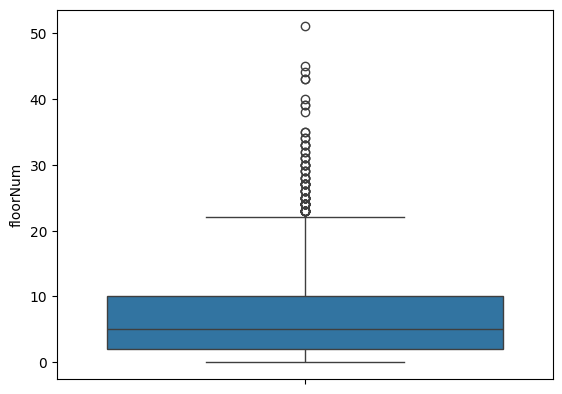

In [80]:
sns.boxplot(df['floorNum'])

In [81]:
def categorize_floor(floor):
    if 0 <= floor <= 2:
        return "Low Floor"
    elif 3 <= floor <= 10:
        return "Mid Floor"
    elif 11 <= floor <= 51:
        return "High Floor"
    else:
        return None  # or "Undefined" or any other label for floors outside the defined bins

In [82]:
train_df['floor_category'] = train_df['floorNum'].apply(categorize_floor)

In [83]:
train_df.head()

,property_type,sector,price,bedRoom,bathroom,balcony,floorNum,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score,luxury_category,floor_category
0,flat,sector 77,1.50,3,3,3,4.0,Relatively New,1310.0,0,0,0,0,0,2,97,Medium,Mid Floor
1,flat,sector 108,0.85,3,3,2,2.0,Relatively New,1500.0,0,1,0,0,0,0,65,Medium,Low Floor
2,flat,sector 12,0.60,2,2,1,0.0,New Property,800.0,0,0,0,1,0,1,0,Low,Low Floor
3,flat,sector 99a,0.30,2,1,0,12.0,New Property,500.0,0,0,0,0,0,0,0,Low,High Floor
4,flat,sector 102,1.55,3,4,3,7.0,Relatively New,1315.0,0,1,0,0,0,2,152,High,Mid Floor


In [84]:
train_df.drop(columns=['floorNum','luxury_score'],inplace=True)

In [85]:
train_df.head()

,property_type,sector,price,bedRoom,bathroom,balcony,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_category,floor_category
0,flat,sector 77,1.50,3,3,3,Relatively New,1310.0,0,0,0,0,0,2,Medium,Mid Floor
1,flat,sector 108,0.85,3,3,2,Relatively New,1500.0,0,1,0,0,0,0,Medium,Low Floor
2,flat,sector 12,0.60,2,2,1,New Property,800.0,0,0,0,1,0,1,Low,Low Floor
3,flat,sector 99a,0.30,2,1,0,New Property,500.0,0,0,0,0,0,0,Low,High Floor
4,flat,sector 102,1.55,3,4,3,Relatively New,1315.0,0,1,0,0,0,2,High,Mid Floor


---
### **Feature Selection**


#Ordinal Encoding

In [86]:
from sklearn.preprocessing import OrdinalEncoder

# Create a copy of the original data for label encoding
data_label_encoded = train_df.copy()

categorical_cols = train_df.select_dtypes(include=['object']).columns

# Apply label encoding to categorical columns
for col in categorical_cols:
    oe = OrdinalEncoder()
    data_label_encoded[col] = oe.fit_transform(data_label_encoded[[col]])
    print(oe.categories_)

# Splitting the dataset into training and testing sets
X_label = data_label_encoded.drop('price', axis=1)
y_label = data_label_encoded['price']

[array(['flat', 'house'], dtype=object)]
[array(['adarsh nagar', 'baldev nagar', 'bhim nagar', 'dwarka expressway',
       'garhi harsaru', 'gwal pahari', 'imt manesar', 'madanpuri',
       'manesar', 'new', 'new sector 2', 'sector 1',
       'sector 1 imt manesar', 'sector 102', 'sector 103', 'sector 104',
       'sector 105', 'sector 106', 'sector 107', 'sector 108',
       'sector 109', 'sector 10a', 'sector 11', 'sector 110',
       'sector 111', 'sector 112', 'sector 113', 'sector 12', 'sector 13',
       'sector 14', 'sector 15', 'sector 17', 'sector 17a', 'sector 17b',
       'sector 1a imt manesar', 'sector 2', 'sector 21', 'sector 22',
       'sector 23', 'sector 24', 'sector 25', 'sector 26', 'sector 27',
       'sector 28', 'sector 3', 'sector 3 phase 2',
       'sector 3 phase 3 extension', 'sector 30', 'sector 31',
       'sector 33', 'sector 36', 'sector 36a', 'sector 37', 'sector 37c',
       'sector 37d', 'sector 38', 'sector 39', 'sector 4', 'sector 40',
       'sector

In [87]:
X_label

,property_type,sector,bedRoom,bathroom,balcony,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_category,floor_category
0,0.0,97.0,3,3,3.0,3.0,1310.0,0,0,0,0,0,2,2.0,2.0
1,0.0,19.0,3,3,2.0,3.0,1500.0,0,1,0,0,0,0,2.0,1.0
2,0.0,27.0,2,2,1.0,1.0,800.0,0,0,0,1,0,1,1.0,1.0
3,0.0,119.0,2,1,0.0,1.0,500.0,0,0,0,0,0,0,1.0,0.0
4,0.0,13.0,3,4,3.0,3.0,1315.0,0,1,0,0,0,2,0.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3539,0.0,91.0,3,3,4.0,1.0,1900.0,0,1,0,0,0,0,2.0,2.0
3540,0.0,85.0,1,1,0.0,3.0,610.0,0,0,0,0,0,0,1.0,1.0
3541,0.0,93.0,4,5,4.0,3.0,2629.0,0,1,0,0,0,2,0.0,0.0
3542,0.0,111.0,3,3,3.0,4.0,1288.0,0,0,0,1,0,0,1.0,1.0


In [88]:
y_label

0       1.50
1       0.85
2       0.60
3       0.30
4       1.55
        ... 
3539    1.66
3540    0.80
3541    3.85
3542    1.25
3543    1.50
Name: price, Length: 3544, dtype: float64

---


## 8 Feature Selection Techniques

There are several techniques for feature selection. In this notebook, we will explore 8 of them.
 These techniques are:
 1. Correlation Analysis
 2. Random Forest Feature Importance
 3. Gradient Boosting Feature Importances
 4. Permutation Importance
 5. Recursive Feature Elimination
 6. Lasso Regression
 7. Principal Component Analysis (PCA)
 8. SHAP Values
For every technique get the feature importance scores and then find average of them into a single dataframe.
which feature  has greater average score, that feature is more important.


### Technique 1 - Correlation Analysis

 Correlation Analysis is a statistical technique that can show whether and how strongly pairs of variables are related.
 The correlation coefficient ranges from -1 to 1. When it is close to 1, it means that there is a strong positive correlation.
When the coefficient is close to -1, it means that there is a strong negative correlation.


<Axes: >

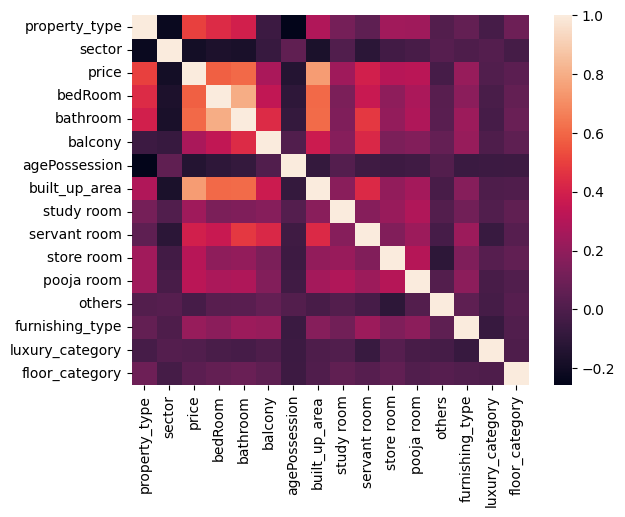

In [89]:
sns.heatmap(data_label_encoded.corr())

In [90]:
fi_df1 = data_label_encoded.corr()['price'].iloc[1:].to_frame().reset_index().rename(columns={'index':'feature','price':'corr_coeff'})
fi_df1

,feature,corr_coeff
0,sector,-0.192886
1,price,1.000000
2,bedRoom,0.578395
3,bathroom,0.604561
4,balcony,0.270141
5,agePossession,-0.136513
6,built_up_area,0.744957
7,study room,0.241894
8,servant room,0.392165
9,store room,0.309637


### Technique 2 - Random Forest Feature Importance

Random Forest Feature Importance is a technique used to evaluate the importance of each feature in a dataset. It is based on the concept of decision trees, where each decision tree is a model that splits the data into subsets based on the values of the input features. The importance of a feature is determined by how well it separates the classes or predicts the target variable. Features that are used more often in the decision-making process are considered more important.


In [91]:
from sklearn.ensemble import RandomForestRegressor

# Train a Random Forest regressor on label encoded data
rf_label = RandomForestRegressor(n_estimators=100, random_state=42)
rf_label.fit(X_label, y_label)

# Extract feature importance scores for label encoded data
fi_df2 = pd.DataFrame({
    'feature': X_label.columns,
    'rf_importance': rf_label.feature_importances_
}).sort_values(by='rf_importance', ascending=False)

fi_df2

,feature,rf_importance
6,built_up_area,0.641370
1,sector,0.108223
0,property_type,0.106647
3,bathroom,0.027143
2,bedRoom,0.025823
8,servant room,0.020729
5,agePossession,0.014689
4,balcony,0.013667
13,luxury_category,0.008507
9,store room,0.008215


### Technique 3 - Gradient Boosting Feature importances

Gradient Boosting is a powerful machine learning technique used for both regression and classification problems. It is an ensemble learning method that combines multiple weak models to create a strong predictive model. The basic idea is to train each model on the residuals of the previous model, which leads to a model that is more accurate than any of the individual models.

In the context of feature selection, Gradient Boosting can be used to evaluate the importance of each feature in the dataset. The importance is calculated based on how well each feature separates the classes or predicts the target variable. Features that are used more often in the decision-making process are considered more important.

Gradient Boosting is particularly useful for feature selection because it can handle large datasets with many features and is robust to outliers and missing values. Additionally, it can handle both categorical and numerical features, making it a versatile technique for a wide range of datasets.

In the following code, we will use Gradient Boosting to train a model on the label encoded data and extract the feature importance scores. These scores will help us understand which features are most important for predicting the target variable.


In [92]:
from sklearn.ensemble import GradientBoostingRegressor

# Train a Random Forest regressor on label encoded data
gb_label = GradientBoostingRegressor()
gb_label.fit(X_label, y_label)

# Extract feature importance scores for label encoded data
fi_df3 = pd.DataFrame({
    'feature': X_label.columns,
    'gb_importance': gb_label.feature_importances_
}).sort_values(by='gb_importance', ascending=False)

fi_df3

,feature,gb_importance
6,built_up_area,0.676161
1,sector,0.112546
0,property_type,0.104542
3,bathroom,0.030619
2,bedRoom,0.027780
8,servant room,0.021610
9,store room,0.013006
5,agePossession,0.005415
4,balcony,0.002075
7,study room,0.001780


### Technique 4 - Permutation Importance

* Permutation importance is a technique used to evaluate the importance of each feature in a model by randomly permuting the values of each feature and measuring the decrease in model performance.
* It is a model-agnostic method, meaning it can be applied to any machine learning model.
* The idea is that if a feature is important, then randomly shuffling its values should significantly decrease the model's performance.
* The importance score is calculated as the difference in performance before and after permuting the feature.
* This method is particularly useful for understanding how each feature contributes to the model's predictions and can help in feature selection and engineering.
* It is also useful for identifying features that are highly correlated with the target variable, as permuting these features will result in a significant decrease in model performance.


In [93]:
from sklearn.inspection import permutation_importance
from sklearn.model_selection import train_test_split

X_train_label, X_test_label, y_train_label, y_test_label = train_test_split(X_label, y_label, test_size=0.2, random_state=42)

# Train a Random Forest regressor on label encoded data
rf_label = RandomForestRegressor(n_estimators=100, random_state=42)
rf_label.fit(X_train_label, y_train_label)

# Calculate Permutation Importance
perm_importance = permutation_importance(rf_label, X_test_label, y_test_label, n_repeats=30, random_state=42)

# Organize results into a DataFrame
fi_df4 = pd.DataFrame({
    'feature': X_label.columns,
    'permutation_importance': perm_importance.importances_mean
}).sort_values(by='permutation_importance', ascending=False)

fi_df4

,feature,permutation_importance
6,built_up_area,0.736770
0,property_type,0.231590
1,sector,0.151954
8,servant room,0.015788
3,bathroom,0.009208
2,bedRoom,0.003400
14,floor_category,0.002711
5,agePossession,0.002567
4,balcony,0.001136
13,luxury_category,0.000315


### Technique 5 - LASSO

LASSO (Least Absolute Shrinkage and Selection Operator) is a linear regression technique that adds a term to the cost function that is proportional to the absolute value of the magnitude of the coefficients. This term is known as the L1 regularization term. The L1 regularization term has the effect of shrinking the coefficients of the less important features towards zero, effectively selecting the most important features for the model.
 The LASSO technique is particularly useful for feature selection because it can set the coefficients of the least important features to zero, effectively removing them from the model. This is in contrast to Ridge regression, which also uses regularization but does not set coefficients to zero.
 The LASSO technique is useful in scenarios where there are a large number of features, and not all of them are relevant to the problem at hand. By applying LASSO, the model can automatically select the most important features and reduce the dimensionality of the problem.
 The LASSO technique is also useful for reducing overfitting by reducing the magnitude of the coefficients, which can help to prevent the model from fitting the noise in the data.
 The LASSO technique is widely used in many fields, including finance, economics, biology, and computer science, among others.


In [94]:
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_label)

# Train a LASSO regression model
# We'll use a relatively small value for alpha (the regularization strength) for demonstration purposes
lasso = Lasso(alpha=0.01, random_state=42)
lasso.fit(X_scaled, y_label)

# Extract coefficients
fi_df5 = pd.DataFrame({
    'feature': X_label.columns,
    'lasso_coeff': lasso.coef_
}).sort_values(by='lasso_coeff', ascending=False)

fi_df5


,feature,lasso_coeff
6,built_up_area,1.469958
0,property_type,0.700091
3,bathroom,0.284687
9,store room,0.205235
7,study room,0.166691
8,servant room,0.160145
12,furnishing_type,0.133673
10,pooja room,0.068485
13,luxury_category,0.052745
2,bedRoom,0.000000


### Technique 6 - RFE

Recursive Feature Elimination (RFE) is a feature selection technique that recursively eliminates the least important features until a specified number of features is reached. It is a wrapper around a machine learning model that selects the best features by recursively considering smaller and smaller sets of features.
  The RFE algorithm works as follows:
 1. Train the model on the initial set of features.
 2. Calculate the importance of each feature.
 3. Rank the features based on their importance. 
 4. Eliminate the least important feature.
 5. Repeat steps 1-4 until the desired number of features is reached.
 
 RFE is particularly useful when the number of features is large and there is a need to reduce the dimensionality of the dataset. It is also useful for feature selection in cases where the model is sensitive to the number of features.
 
 The advantages of RFE include:
 - It is simple to implement.
 - It can be used with any machine learning model.
 - It is computationally efficient.
 
 The disadvantages of RFE include:
 - It can be computationally expensive for large datasets.
 - It may not always select the optimal set of features.
 - It can be sensitive to the choice of the machine learning model and its parameters.



In [95]:
from sklearn.feature_selection import RFE

# Initialize the base estimator
estimator = RandomForestRegressor()

# Apply RFE on the label-encoded and standardized training data
selector_label = RFE(estimator, n_features_to_select=X_label.shape[1], step=1)
selector_label = selector_label.fit(X_label, y_label)

# Get the selected features based on RFE
selected_features = X_label.columns[selector_label.support_]

# Extract the coefficients for the selected features from the underlying linear regression model
selected_coefficients = selector_label.estimator_.feature_importances_

# Organize the results into a DataFrame
fi_df6 = pd.DataFrame({
    'feature': selected_features,
    'rfe_score': selected_coefficients
}).sort_values(by='rfe_score', ascending=False)

fi_df6


,feature,rfe_score
6,built_up_area,0.640015
0,property_type,0.111848
1,sector,0.110856
3,bathroom,0.027747
2,bedRoom,0.021871
8,servant room,0.021058
5,agePossession,0.014259
4,balcony,0.013032
9,store room,0.007722
13,luxury_category,0.007616


### Technique 7 - Linear Regression Weights

In [97]:
from sklearn.linear_model import LinearRegression

In [98]:
# Train a linear regression model on the label-encoded and standardized training data
lin_reg = LinearRegression()
lin_reg.fit(X_scaled, y_label)

# Extract coefficients
fi_df7 = pd.DataFrame({
    'feature': X_label.columns,
    'reg_coeffs': lin_reg.coef_
}).sort_values(by='reg_coeffs', ascending=False)

fi_df7


,feature,reg_coeffs
6,built_up_area,1.477326
0,property_type,0.700787
3,bathroom,0.309664
9,store room,0.209510
7,study room,0.175191
8,servant room,0.167921
12,furnishing_type,0.142659
10,pooja room,0.072267
13,luxury_category,0.063523
5,agePossession,-0.010942


### Technique 8 - SHAP

In [99]:
!pip install shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 540.1/540.1 KB 1.1 MB/s eta 0:00:0000:0100:01


In [100]:
import shap

# Compute SHAP values using the trained Random Forest model
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_label, y_label)

explainer = shap.TreeExplainer(rf)
shap_values = explainer.shap_values(X_label)

# Summing the absolute SHAP values across all samples to get an overall measure of feature importance
shap_sum = np.abs(shap_values).mean(axis=0)

shap_values


array([[-0.18494262, -0.10086464, -0.01783355, ...,  0.0217297 ,
         0.00056539, -0.00242802],
       [-0.26889186, -0.15665257, -0.0171905 , ..., -0.009956  ,
        -0.00125751, -0.09311704],
       [-0.16079132, -0.01541084, -0.05538949, ...,  0.01170601,
        -0.01475126, -0.01732217],
       ...,
       [-0.3313155 ,  0.18951903,  0.02840307, ...,  0.03467787,
         0.02885798,  0.06834306],
       [-0.19358219, -0.4230326 , -0.0055086 , ..., -0.00608191,
        -0.00263181, -0.00636121],
       [-0.21007566, -0.10131668, -0.08616213, ..., -0.00524104,
        -0.00443209, -0.0186604 ]])

In [101]:
fi_df8 = pd.DataFrame({
    'feature': X_label.columns,
    'SHAP_score': np.abs(shap_values).mean(axis=0)
}).sort_values(by='SHAP_score', ascending=False)

fi_df8

,feature,SHAP_score
6,built_up_area,1.221203
0,property_type,0.473889
1,sector,0.392317
3,bathroom,0.112232
8,servant room,0.095340
2,bedRoom,0.053884
4,balcony,0.044220
5,agePossession,0.026950
14,floor_category,0.025407
12,furnishing_type,0.020683


In [102]:
final_fi_df = fi_df1.merge(fi_df2,on='feature').merge(fi_df3,on='feature').merge(fi_df4,on='feature').merge(fi_df5,on='feature').merge(fi_df6,on='feature').merge(fi_df7,on='feature').merge(fi_df8,on='feature').set_index('feature')

In [103]:
final_fi_df


,corr_coeff,rf_importance,gb_importance,permutation_importance,lasso_coeff,rfe_score,reg_coeffs,SHAP_score
feature,,,,,,,,
sector,-0.192886,0.108223,0.112546,0.151954,-0.044979,0.110856,-0.053794,0.392317
bedRoom,0.578395,0.025823,0.027780,0.003400,0.000000,0.021871,-0.024392,0.053884
bathroom,0.604561,0.027143,0.030619,0.009208,0.284687,0.027747,0.309664,0.112232
balcony,0.270141,0.013667,0.002075,0.001136,-0.050669,0.013032,-0.073362,0.044220
agePossession,-0.136513,0.014689,0.005415,0.002567,-0.003339,0.014259,-0.010942,0.026950
built_up_area,0.744957,0.641370,0.676161,0.736770,1.469958,0.640015,1.477326,1.221203
study room,0.241894,0.005766,0.001780,0.000040,0.166691,0.004354,0.175191,0.014258
servant room,0.392165,0.020729,0.021610,0.015788,0.160145,0.021058,0.167921,0.095340
store room,0.309637,0.008215,0.013006,-0.000887,0.205235,0.007722,0.209510,0.015974


##Base Line Model

In [104]:
# normalize the score
final_fi_df = final_fi_df.divide(final_fi_df.sum(axis=0), axis=1)

In [105]:
final_fi_df[['rf_importance','gb_importance','permutation_importance','rfe_score','SHAP_score']].mean(axis=1).sort_values(ascending=False)

feature
built_up_area      0.717767
sector             0.145550
bathroom           0.032090
servant room       0.026922
bedRoom            0.022895
balcony            0.011009
agePossession      0.010890
store room         0.007845
floor_category     0.006209
luxury_category    0.005704
furnishing_type    0.004369
study room         0.004065
pooja room         0.002870
others             0.001815
dtype: float64

In [106]:
# to drop pooja room, study room, others
X_label

,property_type,sector,bedRoom,bathroom,balcony,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_category,floor_category
0,0.0,97.0,3,3,3.0,3.0,1310.0,0,0,0,0,0,2,2.0,2.0
1,0.0,19.0,3,3,2.0,3.0,1500.0,0,1,0,0,0,0,2.0,1.0
2,0.0,27.0,2,2,1.0,1.0,800.0,0,0,0,1,0,1,1.0,1.0
3,0.0,119.0,2,1,0.0,1.0,500.0,0,0,0,0,0,0,1.0,0.0
4,0.0,13.0,3,4,3.0,3.0,1315.0,0,1,0,0,0,2,0.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3539,0.0,91.0,3,3,4.0,1.0,1900.0,0,1,0,0,0,0,2.0,2.0
3540,0.0,85.0,1,1,0.0,3.0,610.0,0,0,0,0,0,0,1.0,1.0
3541,0.0,93.0,4,5,4.0,3.0,2629.0,0,1,0,0,0,2,0.0,0.0
3542,0.0,111.0,3,3,3.0,4.0,1288.0,0,0,0,1,0,0,1.0,1.0


In [107]:
# with all the cols
from sklearn.model_selection import cross_val_score

rf = RandomForestRegressor(n_estimators=100, random_state=42)

scores = cross_val_score(rf, X_label, y_label, cv=5, scoring='r2')

In [108]:
scores.mean()

0.8055367194292081

In [109]:
rf = RandomForestRegressor(n_estimators=100, random_state=42)

scores = cross_val_score(rf, X_label.drop(columns=['pooja room', 'study room', 'others']), y_label, cv=5, scoring='r2')

In [110]:
scores.mean()

0.8053077177175979

In [111]:
export_df = X_label.drop(columns=['pooja room', 'study room', 'others'])
export_df['price'] = y_label

In [112]:
export_df.to_csv('gurgaon_properties_post_feature_selection.csv', index=False)

In [113]:
export_df

,property_type,sector,bedRoom,bathroom,balcony,agePossession,built_up_area,servant room,store room,furnishing_type,luxury_category,floor_category,price
0,0.0,97.0,3,3,3.0,3.0,1310.0,0,0,2,2.0,2.0,1.50
1,0.0,19.0,3,3,2.0,3.0,1500.0,1,0,0,2.0,1.0,0.85
2,0.0,27.0,2,2,1.0,1.0,800.0,0,0,1,1.0,1.0,0.60
3,0.0,119.0,2,1,0.0,1.0,500.0,0,0,0,1.0,0.0,0.30
4,0.0,13.0,3,4,3.0,3.0,1315.0,1,0,2,0.0,2.0,1.55
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3539,0.0,91.0,3,3,4.0,1.0,1900.0,1,0,0,2.0,2.0,1.66
3540,0.0,85.0,1,1,0.0,3.0,610.0,0,0,0,1.0,1.0,0.80
3541,0.0,93.0,4,5,4.0,3.0,2629.0,1,0,2,0.0,0.0,3.85
3542,0.0,111.0,3,3,3.0,4.0,1288.0,0,0,0,1.0,1.0,1.25
